## XGBOOST

### XG Means eXtra Gradient!

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load datasets

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.targetm

### Look Datasets

In [ ]:
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2)

# 0.8 * 0.1 = 0.08 validation dataset
X_tr, X_val, y_tr, y_val  = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2023)

### Make Model and tuning!

In [ ]:
# first choose the parameters

params = {
    'max_depth':3,
    'eta':0.02,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
# boosting repeat cnt
num_rounds =400

In [ ]:
# 전용 XGBOOST 객체로 변경 필요 -> DMatrix
dtr= xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label=y_test)

In [ ]:
# 조기중단 시 최소 반복 횟수 50으로 정함
# 조기 중단 수행시 validation 과 eval_metric 설정 필수

eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds
                      ,early_stopping_rounds = 50, evals =eval_list)

In [ ]:
pred_probs = xgb_model.predict(dtest)
preds = [1 if i >0.5 else 0 for i in pred_probs]
print(f'{preds[:10]}')

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1]


## Visualization


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

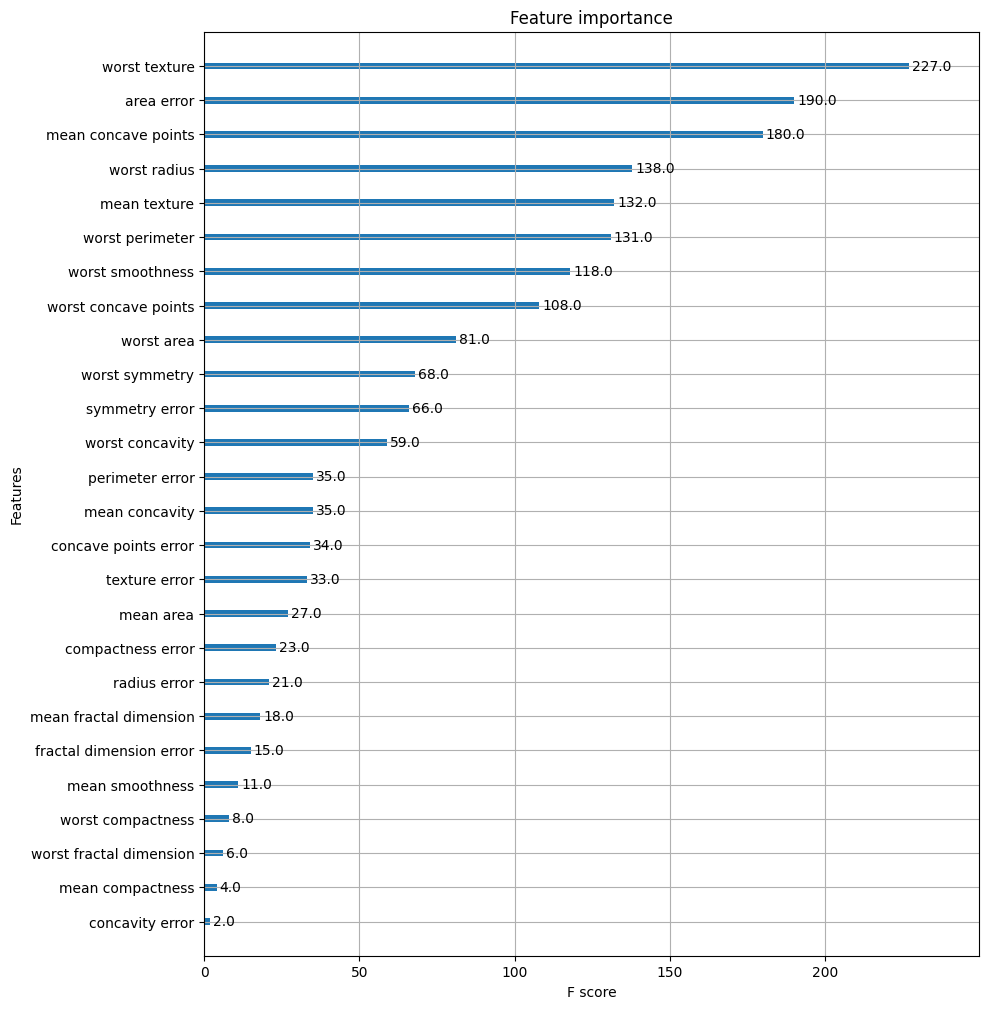

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

만약 scikit-learn에 wrapping 하고 싶으면 from xgboost import XGBClassfier 사용


# LightGBM